## Isotopic distributions
Here we will calculate the isotopic distribution of a compound, simulate a mass spectrum from that distribution and compare this result to experimental data.


In [2]:
using MSJ

In [3]:
info("~/data.mzXML")

2-element Array{String,1}:
 "77 scans"
 "MS1+"    

The data contains 77 ESI-MS scans.
We we take the average of the file.

In [4]:
a = average("~/data.mzXML") ;

Before plotting the resulting mass spectrum, we will calculate the isotopic distribution.

The chemical formula of the compound is (nBuSn)<sub>12</sub>O<sub>14</sub>(OH)<sub>6</sub>.

We are interested in the doubly charged ion, so the charge is set to 2.

We ask for 80% of the distributions.

In [5]:
I = isotopic_distribution("(CH3CH2CH2CH2Sn)12 O14 (OH)6", 0.8, charge = 2)

Dict("O" => 20,"C" => 48,"H" => 114,"Sn" => 12)


29729×19 Array{Union{Float64, Int64, String},2}:
     "Masses"   "Probability"   "120Sn"  …   "18O"   "17O"     "1H"   "2H"
 1215.81       0.00134949      5            0       0       114      0    
 1214.81       0.00125403      4            0       0       114      0    
 1217.81       0.00120034      4            0       0       114      0    
 1216.81       0.00112393      5            0       0       114      0    
 1219.81       0.00107581      5         …  0       0       114      0    
 1216.31       0.00106289      5            0       0       114      0    
 1219.31       0.00101738      5            0       0       114      0    
 1217.81       0.0010079       6            0       0       114      0    
 1213.81       0.0010038       4            0       0       114      0    
 1218.81       0.000999704     4         …  0       0       114      0    
 1218.81       0.000968784     5            0       0       114      0    
 1216.81       0.000959484     4            0      

The distribution may be exported into a file using the `DelimitedFiles` package.

In [6]:
using DelimitedFiles

writedlm("~/distribution.csv",  I, '\t')

We see that requiring 80% of the distributions leads to 29720 different configurations.

This distribution will now be passed to the `simulate` function.

In [7]:
sim = simulate(I, 0.19)

msJ.MSscan(1, 0.0, 12129.270644193977, [1195.100606705514, 1195.1496322444132, 1195.1986577833125, 1195.2476833222115, 1195.2967088611106, 1195.3457344000096, 1195.3947599389087, 1195.4437854778078, 1195.492811016707, 1195.541836555606  …  1243.6358902156235, 1243.6849157545228, 1243.7339412934218, 1243.7829668323209, 1243.83199237122, 1243.881017910119, 1243.930043449018, 1243.9790689879173, 1244.0280945268164, 1244.0771200657155], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0, 1217.7994312157975, 100.0, 0.0, "", "", 0.0)

A mass spectrum has been produced with a gaussian peak shape with 0.19 Da width.

We will compare the simulated distribution with the experimental one.

In [8]:
using Plots
gr()

Plots.GRBackend()

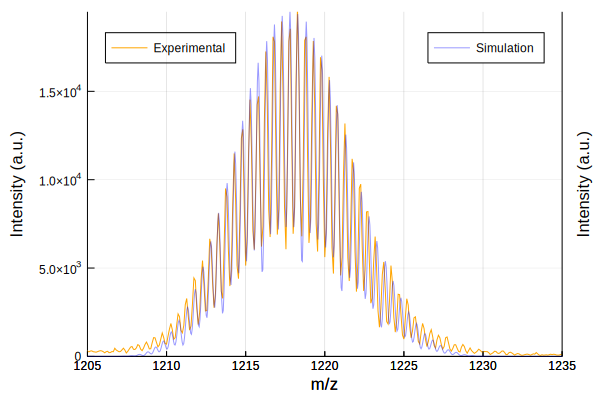

In [9]:
plot(
    a,
    method=:absolute, 
    label = "Experimental", legend =:topleft,
    xlims = (1205,1235), ylims = (0,1.95e04), 
    color = :orange,
    ylabel = "Intensity"
)
plot!(twinx(), 
    sim,
    method=:absolute, 
    label = "Simulation", 
    xlims = (1205,1235), ylims = (0.,100.),
    color = :blue,
    linealpha = 0.4,
    ylabel = "",
    yaxis=nothing
)


The simulation reproduces very well the experimental data.

We may save the figure as follow:

In [10]:
savefig("~/figure.png")